In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

/tmp/ipykernel_25331/4254741239.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
2024-04-18 17:25:28.403543: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-18 17:25:28.452519: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-18 17:25

## DATA

In [3]:
stock_AAPL_df = pd.read_csv('./data/AAPL.csv')

In [4]:
stock_AAPL_df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2019-04-08 00:00:00+00:00,200.10,200.23,196.34,196.42,25881697,48.157508,48.188795,47.252599,47.271853,103526788,0.0,1.0
1,AAPL,2019-04-09 00:00:00+00:00,199.50,202.85,199.23,200.32,35768237,48.013108,48.819343,47.948128,48.210455,143072948,0.0,1.0
2,AAPL,2019-04-10 00:00:00+00:00,200.62,200.74,198.18,198.68,21695288,48.282655,48.311535,47.695427,47.815761,86781152,0.0,1.0
3,AAPL,2019-04-11 00:00:00+00:00,198.95,201.00,198.44,200.85,20900808,47.880741,48.374109,47.758001,48.338009,83603232,0.0,1.0
4,AAPL,2019-04-12 00:00:00+00:00,198.87,200.14,196.21,199.20,27760668,47.861487,48.167135,47.221313,47.940908,111042672,0.0,1.0


In [5]:
stock_AAPL_df[['year', 'month', 'day']] = stock_AAPL_df['date'].str.split('-', expand=True)
stock_AAPL_df['day'] = stock_AAPL_df['day'].str.split(' ', expand=True)[0]

In [6]:
scaler = MinMaxScaler((-1, 1))
stock_AAPL_df[['close', 'high', 'low', 'open', 'volume', 'adjClose',
       'adjHigh', 'adjLow', 'adjOpen', 'adjVolume']] = scaler.fit_transform(stock_AAPL_df[['close', 'high', 'low', 'open', 'volume', 'adjClose',
       'adjHigh', 'adjLow', 'adjOpen', 'adjVolume']])
stock_AAPL_df


,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor,year,month,day
0,AAPL,2019-04-08 00:00:00+00:00,-0.532824,-0.555303,-0.530549,-0.552078,-0.909604,-0.919391,-0.933469,-0.921418,-0.937131,-0.605406,0.0,1.0,2019,04,08
1,AAPL,2019-04-09 00:00:00+00:00,-0.535830,-0.542363,-0.515998,-0.533065,-0.848053,-0.921243,-0.925404,-0.912478,-0.925050,-0.409068,0.0,1.0,2019,04,09
2,AAPL,2019-04-10 00:00:00+00:00,-0.530219,-0.552784,-0.521285,-0.541060,-0.935668,-0.917787,-0.931899,-0.915726,-0.930130,-0.688545,0.0,1.0,2019,04,10
3,AAPL,2019-04-11 00:00:00+00:00,-0.538585,-0.551500,-0.519976,-0.530481,-0.940614,-0.922940,-0.931099,-0.914922,-0.923408,-0.704322,0.0,1.0,2019,04,11
4,AAPL,2019-04-12 00:00:00+00:00,-0.538986,-0.555748,-0.531204,-0.538525,-0.897906,-0.923187,-0.933746,-0.921820,-0.928519,-0.568091,0.0,1.0,2019,04,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,AAPL,2024-04-01 00:00:00+00:00,-0.683456,-0.698432,-0.665811,-0.675076,-0.798220,0.643196,0.640406,0.649448,0.657891,-0.902074,0.0,1.0,2024,04,01
1254,AAPL,2024-04-02 00:00:00+00:00,-0.689418,-0.707865,-0.672078,-0.685363,-0.765587,0.627939,0.615978,0.633449,0.630732,-0.876051,0.0,1.0,2024,04,02
1255,AAPL,2024-04-03 00:00:00+00:00,-0.685360,-0.701247,-0.670317,-0.686776,-0.787022,0.638324,0.633116,0.637945,0.626999,-0.893144,0.0,1.0,2024,04,03
1256,AAPL,2024-04-04 00:00:00+00:00,-0.689518,-0.695123,-0.669109,-0.679464,-0.738561,0.627682,0.648975,0.641030,0.646306,-0.854498,0.0,1.0,2024,04,04


In [7]:
train_stock_df = stock_AAPL_df[stock_AAPL_df['year'] != '2024']
train_stock_df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor,year,month,day
0,AAPL,2019-04-08 00:00:00+00:00,-0.532824,-0.555303,-0.530549,-0.552078,-0.909604,-0.919391,-0.933469,-0.921418,-0.937131,-0.605406,0.0,1.0,2019,04,08
1,AAPL,2019-04-09 00:00:00+00:00,-0.535830,-0.542363,-0.515998,-0.533065,-0.848053,-0.921243,-0.925404,-0.912478,-0.925050,-0.409068,0.0,1.0,2019,04,09
2,AAPL,2019-04-10 00:00:00+00:00,-0.530219,-0.552784,-0.521285,-0.541060,-0.935668,-0.917787,-0.931899,-0.915726,-0.930130,-0.688545,0.0,1.0,2019,04,10
3,AAPL,2019-04-11 00:00:00+00:00,-0.538585,-0.551500,-0.519976,-0.530481,-0.940614,-0.922940,-0.931099,-0.914922,-0.923408,-0.704322,0.0,1.0,2019,04,11
4,AAPL,2019-04-12 00:00:00+00:00,-0.538986,-0.555748,-0.531204,-0.538525,-0.897906,-0.923187,-0.933746,-0.921820,-0.928519,-0.568091,0.0,1.0,2019,04,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,AAPL,2023-12-22 00:00:00+00:00,-0.565385,-0.579109,-0.547517,-0.558123,-0.839453,0.942248,0.946225,0.948270,0.963491,-0.934955,0.0,1.0,2023,12,22
1188,AAPL,2023-12-26 00:00:00+00:00,-0.568140,-0.586616,-0.548221,-0.565777,-0.890692,0.935206,0.926810,0.946473,0.943308,-0.975817,0.0,1.0,2023,12,26
1189,AAPL,2023-12-27 00:00:00+00:00,-0.567639,-0.588542,-0.556982,-0.571237,-0.772524,0.936486,0.921828,0.924138,0.928911,-0.881582,0.0,1.0,2023,12,27
1190,AAPL,2023-12-28 00:00:00+00:00,-0.565485,-0.582813,-0.546510,-0.563193,-0.858751,0.941992,0.936645,0.950837,0.950122,-0.950344,0.0,1.0,2023,12,28


In [8]:
test_stock_df =  stock_AAPL_df[stock_AAPL_df['year'] == '2024']
test_stock_df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor,year,month,day
1192,AAPL,2024-01-02 00:00:00+00:00,-0.605260,-0.613533,-0.593258,-0.597270,-0.557182,0.840319,0.857196,0.831653,0.860264,-0.709856,0.0,1.0,2024,01,02
1193,AAPL,2024-01-03 00:00:00+00:00,-0.612223,-0.626176,-0.595549,-0.611554,-0.707062,0.822520,0.824497,0.825813,0.822598,-0.829379,0.0,1.0,2024,01,03
1194,AAPL,2024-01-04 00:00:00+00:00,-0.623945,-0.639969,-0.608388,-0.621645,-0.622584,0.792555,0.788824,0.793080,0.795987,-0.762012,0.0,1.0,2024,01,04
1195,AAPL,2024-01-05 00:00:00+00:00,-0.627602,-0.641585,-0.611963,-0.622425,-0.683513,0.783208,0.784645,0.783967,0.793931,-0.810600,0.0,1.0,2024,01,05
1196,AAPL,2024-01-08 00:00:00+00:00,-0.605661,-0.627559,-0.605266,-0.621962,-0.702517,0.839294,0.820921,0.801039,0.795152,-0.825755,0.0,1.0,2024,01,08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,AAPL,2024-04-01 00:00:00+00:00,-0.683456,-0.698432,-0.665811,-0.675076,-0.798220,0.643196,0.640406,0.649448,0.657891,-0.902074,0.0,1.0,2024,04,01
1254,AAPL,2024-04-02 00:00:00+00:00,-0.689418,-0.707865,-0.672078,-0.685363,-0.765587,0.627939,0.615978,0.633449,0.630732,-0.876051,0.0,1.0,2024,04,02
1255,AAPL,2024-04-03 00:00:00+00:00,-0.685360,-0.701247,-0.670317,-0.686776,-0.787022,0.638324,0.633116,0.637945,0.626999,-0.893144,0.0,1.0,2024,04,03
1256,AAPL,2024-04-04 00:00:00+00:00,-0.689518,-0.695123,-0.669109,-0.679464,-0.738561,0.627682,0.648975,0.641030,0.646306,-0.854498,0.0,1.0,2024,04,04


In [9]:
train_stock_df['open'], test_stock_df['open']

(0      -0.552078
 1      -0.533065
 2      -0.541060
 3      -0.530481
 4      -0.538525
           ...   
 1187   -0.558123
 1188   -0.565777
 1189   -0.571237
 1190   -0.563193
 1191   -0.564363
 Name: open, Length: 1192, dtype: float64,
 1192   -0.597270
 1193   -0.611554
 1194   -0.621645
 1195   -0.622425
 1196   -0.621962
           ...   
 1253   -0.675076
 1254   -0.685363
 1255   -0.686776
 1256   -0.679464
 1257   -0.682876
 Name: open, Length: 66, dtype: float64)

## Visialize

In [10]:
total_df = pd.DataFrame(train_stock_df[['open', 'date']], columns=['open', 'cate', 'date']).replace(np.nan, 'train')
total_df = pd.concat([total_df, test_stock_df[['open', 'date']]]).replace(np.nan, 'test')
total_df

,open,cate,date
0,-0.552078,train,2019-04-08 00:00:00+00:00
1,-0.533065,train,2019-04-09 00:00:00+00:00
2,-0.541060,train,2019-04-10 00:00:00+00:00
3,-0.530481,train,2019-04-11 00:00:00+00:00
4,-0.538525,train,2019-04-12 00:00:00+00:00
...,...,...,...
1253,-0.675076,test,2024-04-01 00:00:00+00:00
1254,-0.685363,test,2024-04-02 00:00:00+00:00
1255,-0.686776,test,2024-04-03 00:00:00+00:00
1256,-0.679464,test,2024-04-04 00:00:00+00:00


<Axes: xlabel='date', ylabel='open'>

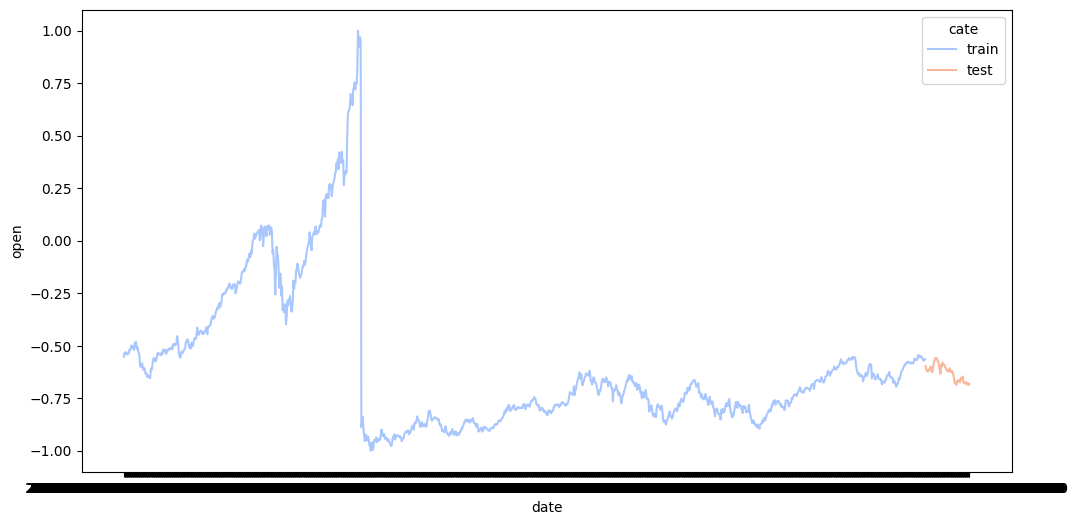

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=total_df, x='date', y='open', palette='coolwarm', hue='cate')

<Axes: xlabel='date', ylabel='open'>

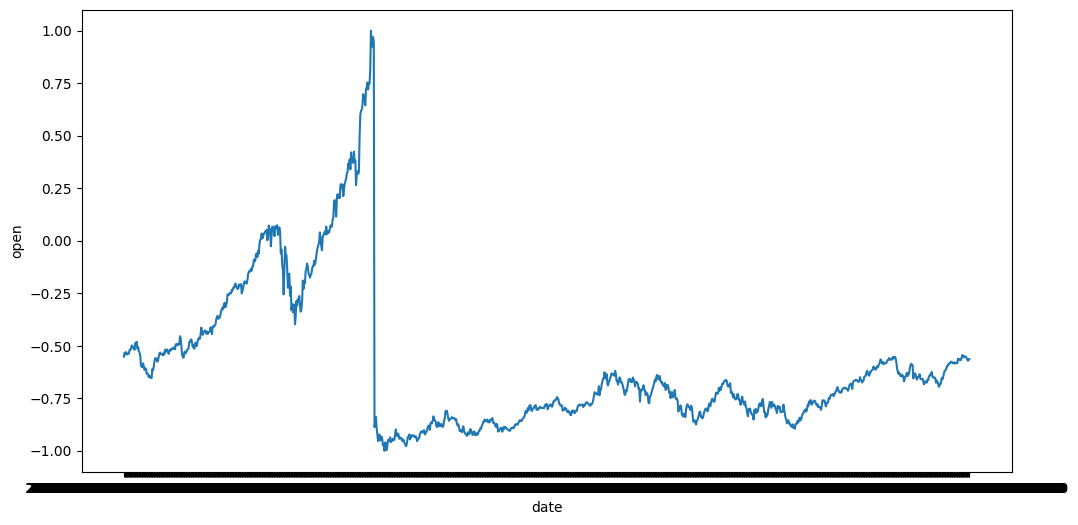

In [12]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=train_stock_df, x='date', y='open')

<Axes: xlabel='date', ylabel='open'>

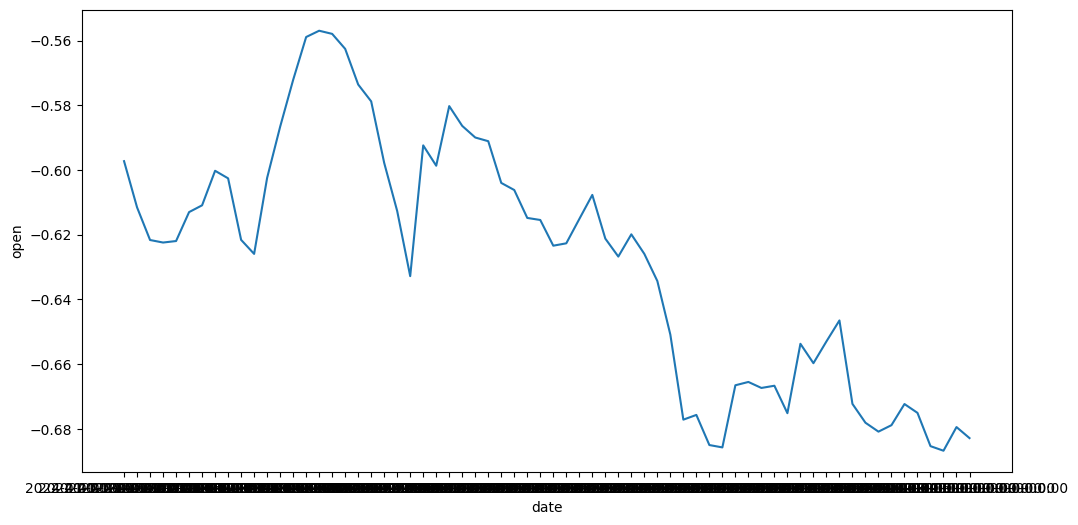

In [13]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=test_stock_df, x='date', y='open')

## Model

In [14]:
X = train_stock_df[['year', 'month', 'day', 'volume']].values.astype(int)
y = train_stock_df['open'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:

ann_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='swish', input_dim=X_train.shape[1]),
    tf.keras.layers.Dense(16, activation='swish'),
    tf.keras.layers.Dense(64, activation='swish'),
    tf.keras.layers.Dense(16, activation='swish'),
    tf.keras.layers.Dense(1)
])
ann_model.compile(optimizer='adam', loss='mean_squared_error', metrics=[tf.keras.metrics.RootMeanSquaredError()])


2024-04-18 17:25:44.797645: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-18 17:25:44.849454: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-18 17:25:44.849766: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [16]:
ann_model.fit(X_train, y_train, epochs=20, batch_size=16)

Epoch 1/20


2024-04-18 17:25:46.309228: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-04-18 17:25:46.775220: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f715cd7f9e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-18 17:25:46.775250: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-04-18 17:25:46.784075: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-04-18 17:25:46.806841: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1713441346.936265   25761 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


60/60 [==============================] - 3s 5ms/step - loss: 76.1982 - root_mean_squared_error: 8.7292
Epoch 2/20
60/60 [==============================] - 0s 4ms/step - loss: 3.4084 - root_mean_squared_error: 1.8462
Epoch 3/20
60/60 [==============================] - 0s 4ms/step - loss: 2.4545 - root_mean_squared_error: 1.5667
Epoch 4/20
60/60 [==============================] - 0s 4ms/step - loss: 1.6576 - root_mean_squared_error: 1.2875
Epoch 5/20
60/60 [==============================] - 0s 4ms/step - loss: 1.0455 - root_mean_squared_error: 1.0225
Epoch 6/20
60/60 [==============================] - 0s 4ms/step - loss: 0.6961 - root_mean_squared_error: 0.8344
Epoch 7/20
60/60 [==============================] - 0s 4ms/step - loss: 0.5205 - root_mean_squared_error: 0.7215
Epoch 8/20
60/60 [==============================] - 0s 4ms/step - loss: 0.3602 - root_mean_squared_error: 0.6002
Epoch 9/20
60/60 [==============================] - 0s 4ms/step - loss: 0.2358 - root_mean_squared_error: 

In [17]:

y_pred = ann_model.predict(scaler.fit(X_test).transform(X_test))

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))


8/8 [==============================] - 0s 3ms/step
Mean Absolute Error: 0.5954608047062541
Mean Squared Error: 0.40766255872876017
Root Mean Squared Error: 0.6384845798676426


## Testing

In [18]:
import joblib
# Save the model
model_path = './models/ann_model.pkl'
joblib.dump(ann_model, model_path)


['./models/ann_model.pkl']

In [19]:
predicted_vals = ann_model.predict(test_stock_df[['year', 'month', 'day', 'volume']].values.astype(int))

3/3 [==============================] - 0s 4ms/step


<Axes: xlabel='date', ylabel='open'>

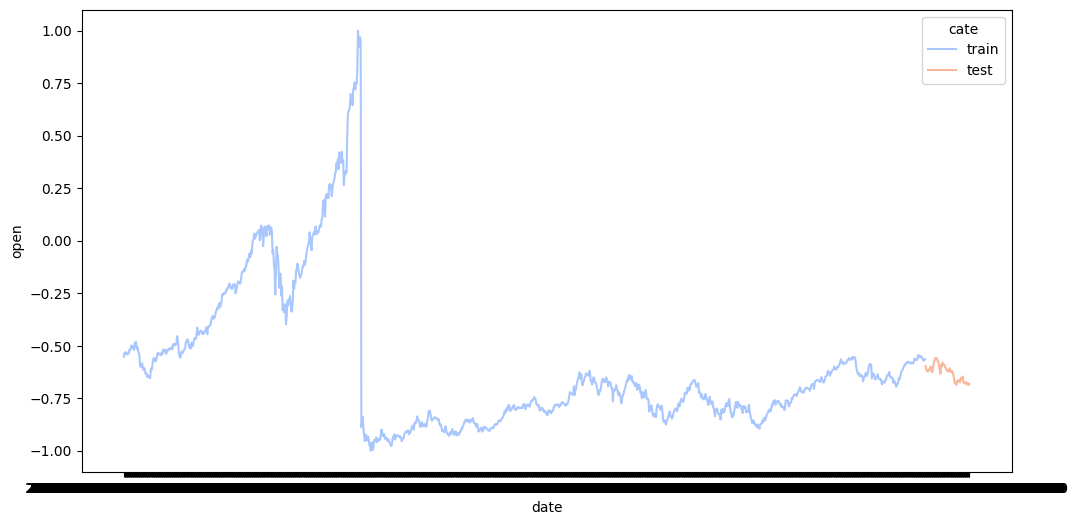

In [20]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=total_df, x='date', y='open', palette='coolwarm', hue='cate')

In [21]:
predicted_df = pd.DataFrame(predicted_vals, columns=['open'])
predicted_df['date'] = test_stock_df['date'].values
predicted_df['cate'] = 'predicted'


In [22]:
prediction_linear_regression_model_graph_df = pd.DataFrame(train_stock_df[['open', 'date']], columns=['open', 'cate', 'date']).replace(np.nan, 'train')
prediction_linear_regression_model_graph_df = pd.concat([prediction_linear_regression_model_graph_df, predicted_df])
prediction_linear_regression_model_graph_df.reset_index(drop=True, inplace=True)

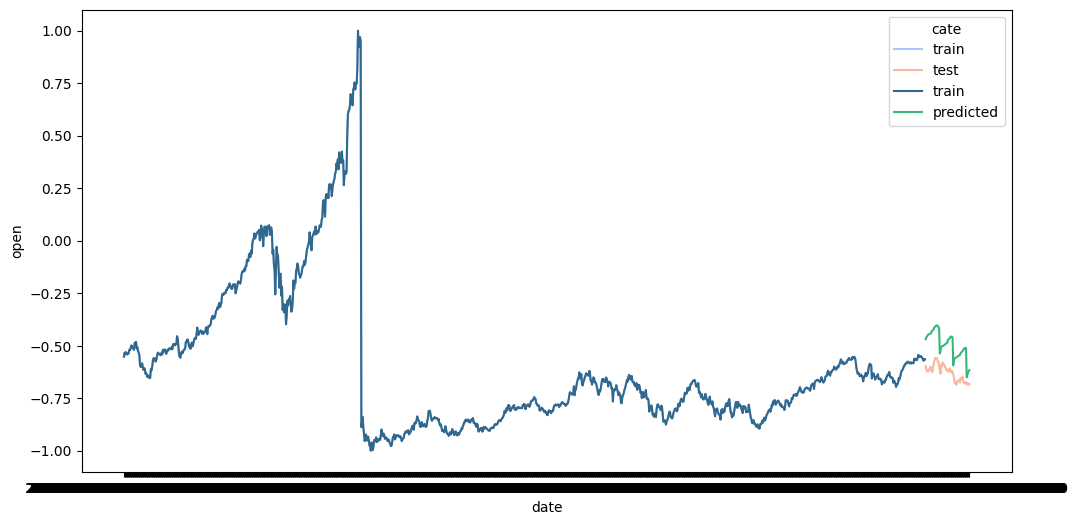

In [23]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=total_df, x='date', y='open', hue='cate', palette='coolwarm')
sns.lineplot(data=prediction_linear_regression_model_graph_df, x='date', y='open', hue='cate', palette='viridis')
plt.show()

## Final Result

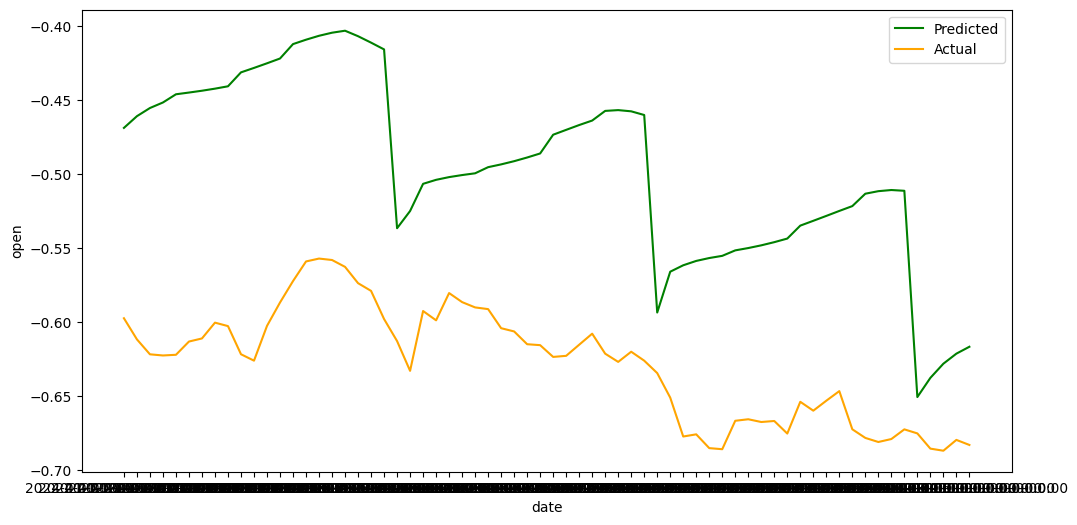

In [24]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=predicted_df, x='date', y='open', color='green', label='Predicted')
sns.lineplot(data=test_stock_df, x='date', y='open', color='orange', label='Actual')
plt.legend()